In [ ]:
print(1)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, glob
from pynwb import NWBHDF5IO
import statsmodels.api as sm, statsmodels.formula.api as smf
from matplotlib.lines import Line2D

from pathlib import Path
from convnwb.io import load_nwbfile

from spiketools.plts.trials import plot_rasters
from spiketools.measures.spikes import compute_firing_rate
from spiketools.measures.trials import (compute_trial_frs, compute_pre_post_rates,
                                        compute_segment_frs, compute_pre_post_averages,
                                        compute_pre_post_diffs)

from spiketools.plts.trials import plot_rasters, plot_rate_by_time

### load data file

In [28]:
sess_file = sorted(glob.glob('../data/000623/sub-*/*.nwb'))[2]
nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
nwbfile

,location,group,group_name,origchannel,pairwise_distances,origchannel_name,x,y,z
id,,,,,,,,,
0,Left ACC,Neuralynx-Atlas-microwire-1 pynwb.ecephys.ElectrodeGroup at 0x140008092748496\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140008089966480\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-1,micro-1,NA,LACC1,-0.76,28.11,20.35
1,Left ACC,Neuralynx-Atlas-microwire-2 pynwb.ecephys.ElectrodeGroup at 0x140008092757392\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140008089966480\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-2,micro-2,NA,LACC2,-0.76,28.11,20.35
2,Left ACC,Neuralynx-Atlas-microwire-3 pynwb.ecephys.ElectrodeGroup at 0x140008125738704\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140008089966480\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-3,micro-3,NA,LACC3,-0.76,28.11,20.35
3,Left ACC,Neuralynx-Atlas-microwire-4 pynwb.ecephys.ElectrodeGroup at 0x140008088529104\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140008089966480\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-4,micro-4,NA,LACC4,-0.76,28.11,20.35
,location,group,group_name,origchannel,pairwise_distances,origchannel_name,x,y,z
id,,,,,,,,,
0,Left ACC,Neuralynx-Atlas-microwire-1 pynwb.ecephys.ElectrodeGroup at 0x140008092748496\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140008089966480\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-1,micro-1,NA,LACC1,-0.76,28.11,20.35
1,Left ACC,Neuralynx-Atlas-microwire-2 pynwb.ecephys.ElectrodeGroup at 0x140008092757392\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140008089966480\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-2,micro-2,NA,LACC2,-0.76,28.11,20.35
2,Left ACC,Neuralynx-Atlas-microwire-3 pynwb.ecephys.ElectrodeGroup at 0x140008125738704\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140008089966480\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-3,micro-3,NA,LACC3,-0.76,28.11,20.35


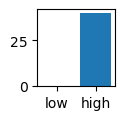

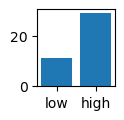

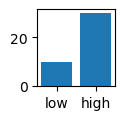

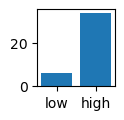

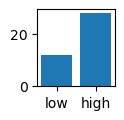

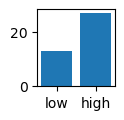

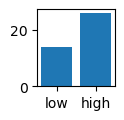

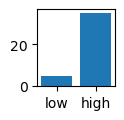

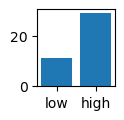

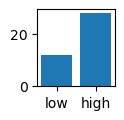

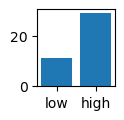

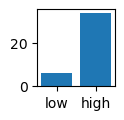

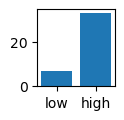

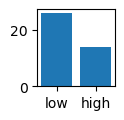

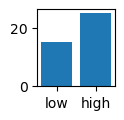

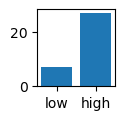

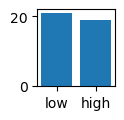

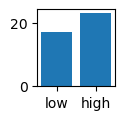

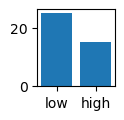

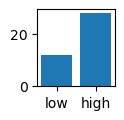

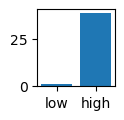

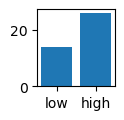

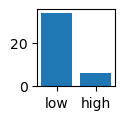

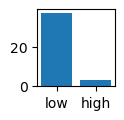

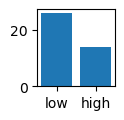

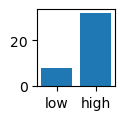

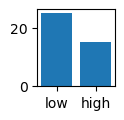

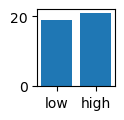

In [39]:
files = sorted(glob.glob('../data/000623/sub-*/*.nwb'))[1:]

for file in files:
    
    nwbfile, io = load_nwbfile(os.path.basename(file), os.path.dirname(file), return_io=True)
    conf_dist = nwbfile.trials['response_confidence'][1:].tolist()
    conf_labels = ['low' if x in [1, 2] else 'high' for x in conf_dist]
    counts = [conf_labels.count('low'), conf_labels.count('high')]
    
    plt.figure(figsize=(1,1))
    plt.bar(['low', 'high'], counts)
    plt.show()

In [13]:
def filter_spikes(spikes, start, stop):
    
    # grab spikes falling within trial times
    spikes = [spike for spike in spikes if start <= spike <= stop]
    # align to 0
    spikes = [spike - start for spike in spikes]
    # truncate all trials to 5s
    spikes = [spike for spike in spikes if spike < 5]      

    # SMOOTH FRS
    window_size = 2
    step = .5

    # Create the time axis for the sliding window
    bins = np.arange(0, 5, step)

    # Create an array to hold the firing rate in each window
    FRs = np.zeros(len(bins))

    # Calculate firing rate for each window
    for i, t in enumerate(bins):
        window_start = t
        window_stop = t + window_size
        spikes_in_window = [spike for spike in spikes if window_start <= spike < window_stop]
        FRs[i] = len(spikes_in_window) / window_size

    return spikes, FRs

def plt_rasters(spikes_by_trial, ax):
    
    ax.eventplot(spikes_by_trial, linelengths=0.8, color='black')
    ax.set_ylabel('Trial #')
    ax.set_xlabel('Time (s)')



def plot_FRs(FRs_by_trial):

    n_cols, n_rows = 5, int(np.ceil(len(FRs_by_trial)/5))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    fig.subplots_adjust(hspace=.8, wspace=0.4)

    # Plot each trial's firing rates
    for trial, FRs in enumerate(FRs_by_trial):

        # print(f'trial {trial+1}, FR: {FRs}')
        row, col = trial//n_cols,  trial%n_cols
        bins = np.arange(0, len(FRs))
        
        axes[row, col].plot(bins, FRs)

    fig.suptitle('Firing Rates Across Trials', fontsize=16)
    plt.show()



sub-CS43, neuron-0


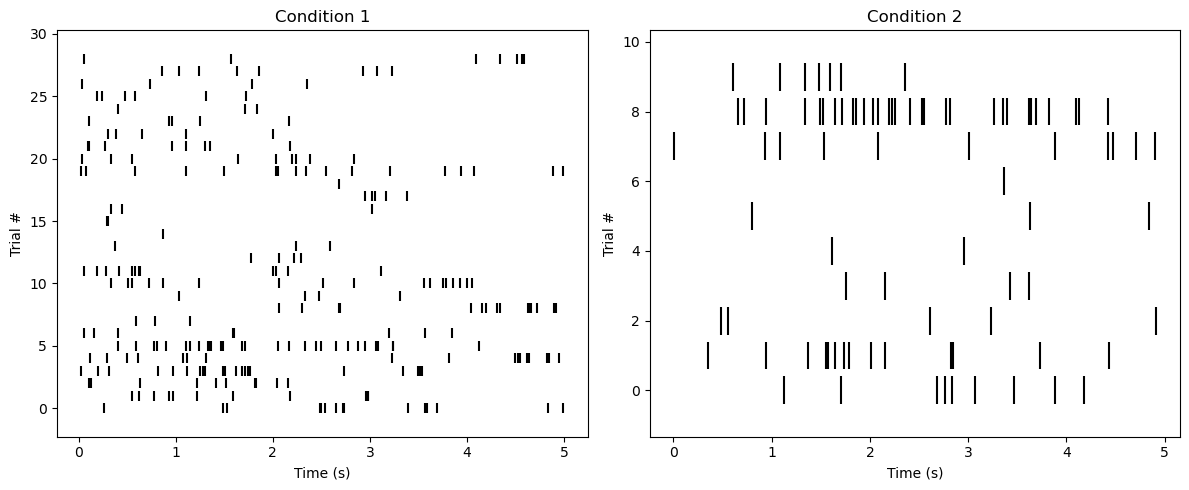

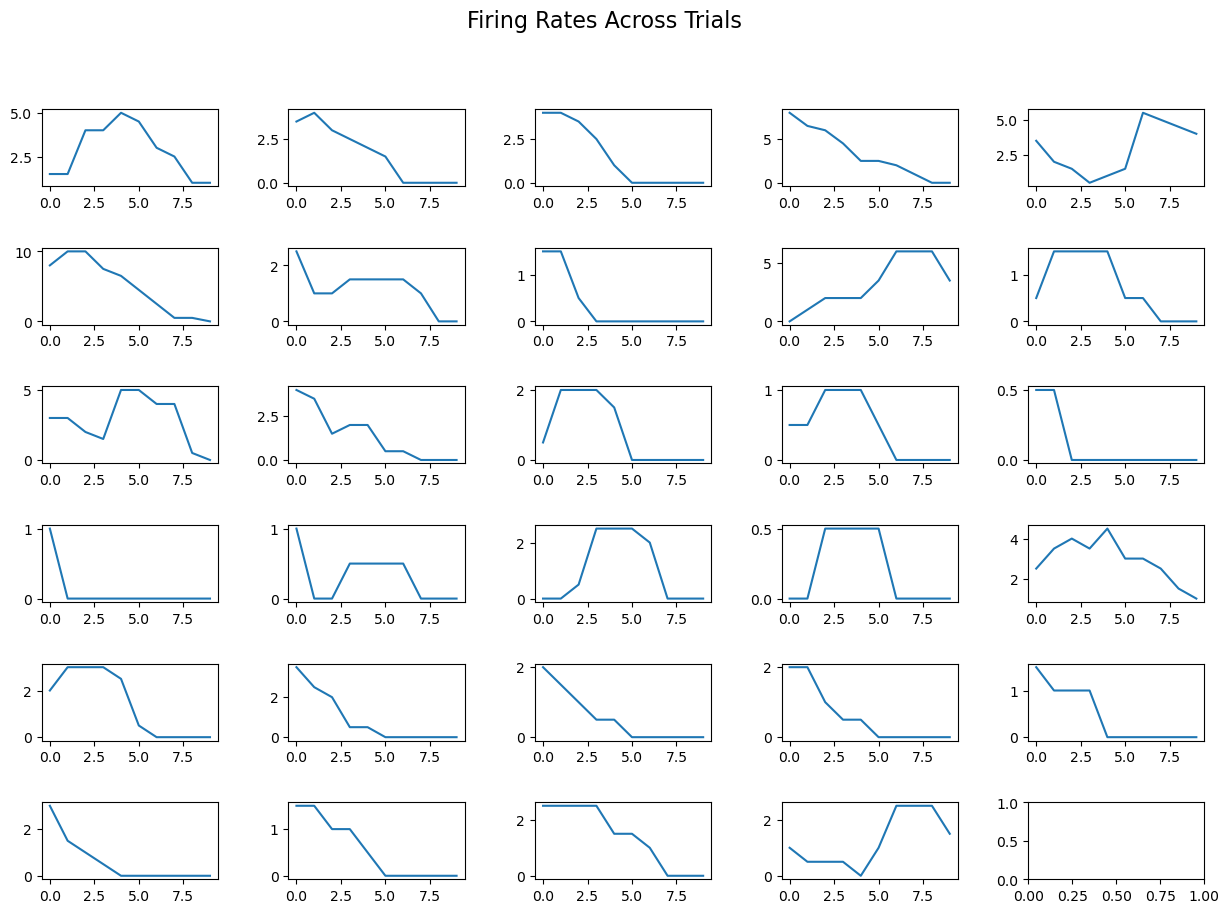

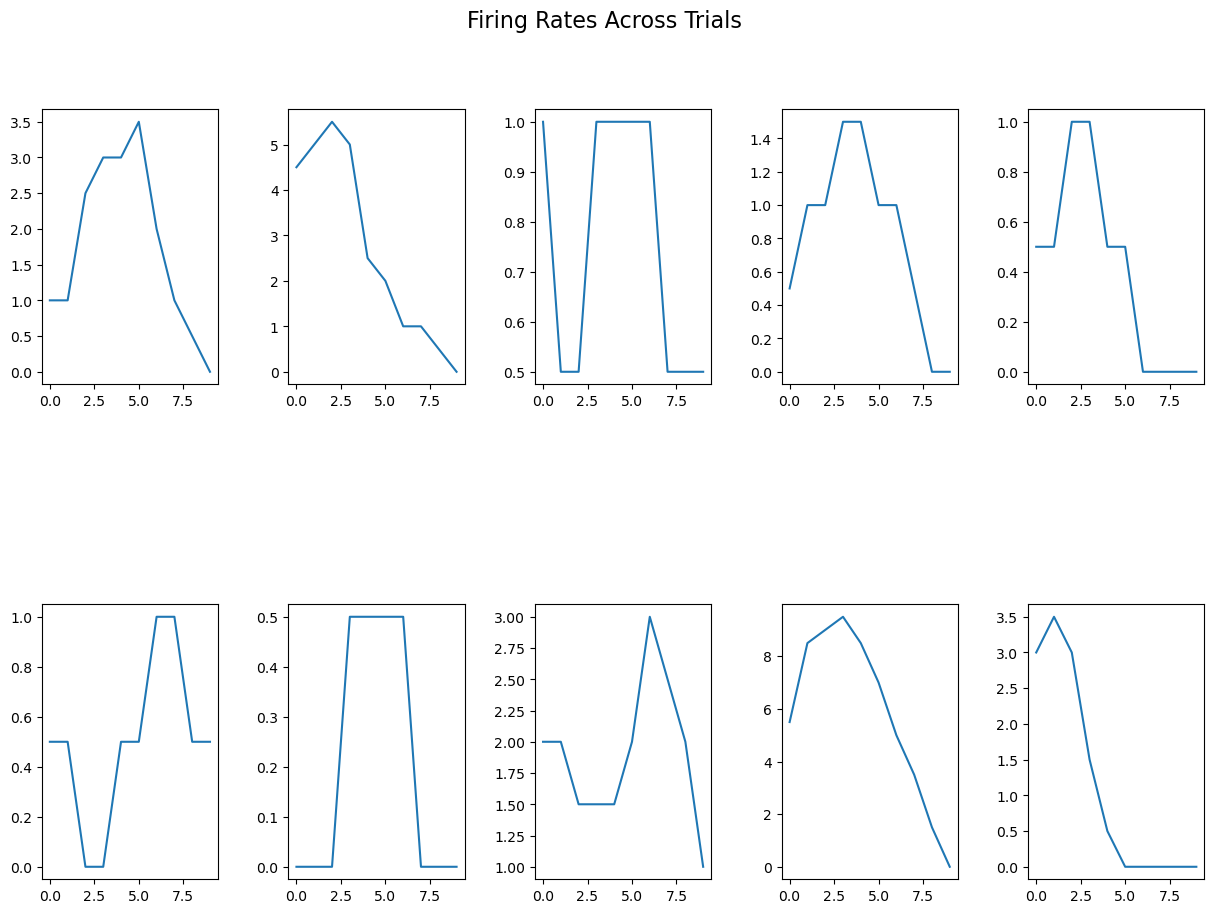

In [14]:
files = sorted(glob.glob('../data/000623/sub-*/*.nwb'))[2:]
c1_spikes_by_trial, c1_FRs_by_trial = [], []
c2_spikes_by_trial, c2_FRs_by_trial = [], []

for file in files:

    nwbfile, io = load_nwbfile(os.path.basename(file), os.path.dirname(file), return_io=True)
    subj = os.path.basename(sess_file)[:8]

    # convert nwb structure to df, and filter condition 1 vs 2 rows
    df_trials = nwbfile.trials[:]
    df_c1 = df_trials[df_trials['response_correct'] == 1.0][1:]
    df_c2 = df_trials[df_trials['response_correct'] == 0.0]
    # print(df_c1.tail())

    # get start & stop times for each trial
    c1_starts, c1_stops = df_c1['start_time'].tolist(), df_c1['stop_time'].tolist()
    c2_starts, c2_stops = df_c2['start_time'].tolist(), df_c2['stop_time'].tolist()

    for neuron in range(len(nwbfile.units)):
        
        spikes = nwbfile.units.get_unit_spike_times(neuron)

        # CONDITION 1
        
        # for every trial
        for start, stop in zip(c1_starts, c1_stops):
            
            c1_spikes, c1_FRs = filter_spikes(spikes, start, stop)

            c1_spikes_by_trial.append(c1_spikes)
            c1_FRs_by_trial.append(c1_FRs)

        # CONDITION 2
        
        # for every trial
        for start, stop in zip(c2_starts, c2_stops):
            
            c2_spikes, c2_FRs = filter_spikes(spikes, start, stop)

            c2_spikes_by_trial.append(c2_spikes)
            c2_FRs_by_trial.append(c2_FRs)

        # PLOT RASTERS 
        print(f'{subj}, neuron-{neuron}')
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        axes[0].set_title('Condition 1')
        plt_rasters(c1_spikes_by_trial, axes[0])

        axes[1].set_title('Condition 2')
        plt_rasters(c2_spikes_by_trial, axes[1])

        plt.tight_layout()  # Adjust layout
        plt.show()

        # PLOT FRS
        plot_FRs(c1_FRs_by_trial)
        plot_FRs(c2_FRs_by_trial)


        break
    break

# print(len(c1_spikes_by_trial), len(c2_spikes_by_trial))
# print(len(c1_spikes_by_trial) + len(c2_spikes_by_trial))
# print(1459*40)
